In [ ]:

import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

In [1]:
from os import chdir
chdir("../")   # only run this ones else error will occur


In [2]:
import numpy as np
from tensorflow.keras.models import load_model

from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


from datetime import datetime

In [3]:
X_train_l = np.load('private/npy/X_train_gender.npy')
X_test_l = np.load('private/npy/X_test_gender.npy')
y_train_l = np.load('private/npy/y_train_gender.npy')
y_test_l = np.load('private/npy/y_test_gender.npy')

In [4]:
def create_model(depth):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    for _ in range(depth):  # Reduce the number of max pooling layers
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    return model


In [5]:
def train_models(depths, epochs):
    validation_accuracies = []

    for depth in depths:
        # Create model
        model = create_model(depth)

        # Train model
        history = model.fit(X_train_l, y_train_l, epochs=epochs, validation_data=(X_test_l, y_test_l), batch_size=64,verbose=0)

        # Record validation accuracy
        validation_accuracies.append(history.history['val_accuracy'])

    return validation_accuracies


In [13]:
validation_accuracies=[]

In [15]:
for i in range(10):

    depths = [1,2,3,4]  # You can modify this list with different depths

    # Define number of epochs
    epochs = 5

    # Train models and save validation accuracies
    validation_accuracies.append(train_models(depths, epochs))


2024-02-12 01:16:50.280697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-12 01:17:14.863498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-12 01:18:58.749362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-12 01:19:27.436584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-12 01:21:17.163453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-12 01:21:41.838658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-12 01:23:25.678070: I tensorflow/core/grappler/optimizers/cust

In [21]:
validation_accuracies

[[[0.711730420589447,
   0.7608153223991394,
   0.7891014814376831,
   0.607737123966217,
   0.6368552446365356],
  [0.3993344306945801,
   0.8173877000808716,
   0.8452578783035278,
   0.9034941792488098,
   0.869800329208374],
  [0.6160565614700317,
   0.6185523867607117,
   0.6098169684410095,
   0.6364392638206482,
   0.8660565614700317],
  [0.6888518929481506,
   0.9026622176170349,
   0.941763699054718,
   0.9575707316398621,
   0.9538269639015198]],
 [[0.607737123966217,
   0.607737123966217,
   0.607737123966217,
   0.607737123966217,
   0.607737123966217],
  [0.6938436031341553,
   0.400166392326355,
   0.44966721534729004,
   0.6235440969467163,
   0.7574875354766846],
  [0.7791181206703186,
   0.7841098308563232,
   0.948003351688385,
   0.9596505761146545,
   0.9546589255332947],
  [0.739600658416748,
   0.917637288570404,
   0.9222129583358765,
   0.9525790214538574,
   0.9550748467445374]],
 [[0.832362711429596,
   0.768302857875824,
   0.7995008230209351,
   0.9039101600

In [16]:
combined_array = np.array(validation_accuracies)

In [17]:
column_averages = np.mean(combined_array, axis=0)

# Print the average of each column
print("Average of each column:", column_averages)

Average of each column: [[0.67683029 0.64937606 0.66921798 0.66351915 0.68282031]
 [0.58165557 0.67620633 0.69559069 0.77242096 0.78731281]
 [0.61900999 0.72911813 0.84346922 0.87932612 0.90582362]
 [0.59367721 0.7516223  0.85361896 0.90183027 0.93315307]]


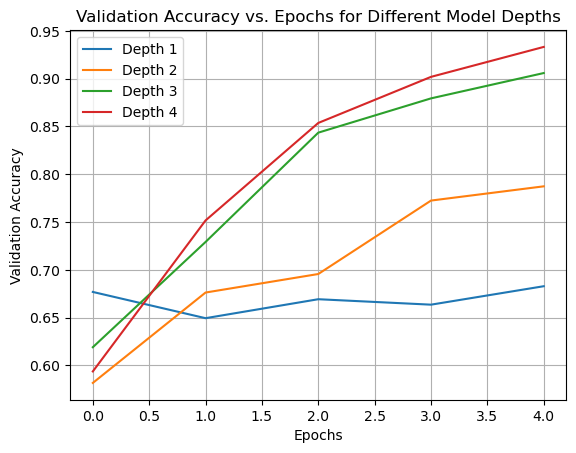

In [20]:
for i, column in enumerate(column_averages):
        plt.plot(column, label=f'Depth {i+1}')
    
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs for Different Model Depths')
plt.legend()
plt.grid(True)

current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"testing records/validation_accuracy_{current_time}.png"
plt.savefig(filename)

In [19]:
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"testing records/validation_accuracy_{current_time}.png"
plt.savefig(filename)

<Figure size 640x480 with 0 Axes>